In [43]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


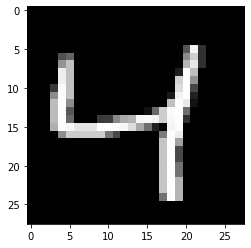

In [36]:
mg = mnist.train.images[2]
plt.imshow(mg.reshape((28, 28)), cmap='Greys_r')

In [31]:
X=mnist.train.images
X = X.reshape(-1, 28,28,1)
X.shape

(60000, 28, 28, 1)

In [32]:
y=mnist.train.labels
y.shape

(60000,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state =7)

In [52]:
batch_size = 100
epochs = 10
input_img = Input(shape = (28, 28, 1))
num_classes = 10

In [58]:
from keras.layers import Dropout

In [59]:
def encoder(input_img):
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 16
    conv1 = BatchNormalization()(conv1) 
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 16
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    drop1 = Dropout(0.4)(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(drop1) #14 x 14 x 32
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 32
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 32
    drop2 = Dropout(0.25)(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(drop2) #7 x 7 x 64 
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    conv4 = BatchNormalization()(conv4)
    return conv4

In [60]:
def decoder(conv4):    
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    drop3 = Dropout(0.25)(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    drop4 = Dropout(0.4)(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [61]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.001))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [62]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [63]:
autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, X_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 398s 8ms/step - loss: 0.0164 - val_loss: 0.0045
Epoch 2/10
48000/48000 [==============================] - 438s 9ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 3/10
48000/48000 [==============================] - 451s 9ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 4/10
48000/48000 [==============================] - 459s 10ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 5/10
48000/48000 [==============================] - 487s 10ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 6/10
48000/48000 [==============================] - 484s 10ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 7/10
48000/48000 [==============================] - 468s 10ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 8/10
48000/48000 [==============================] - 491s 10ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 9/10
48000/48000 [==============================] - 473s 10ms/step - loss: 0.0026 - val_los

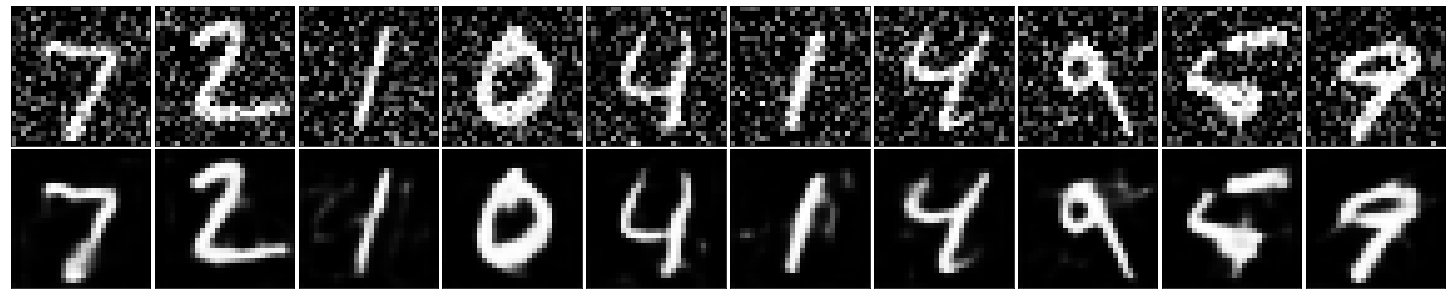

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noise_factor=0.25
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = autoencoder.predict(noisy_imgs.reshape((10, 28, 28, 1)))

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

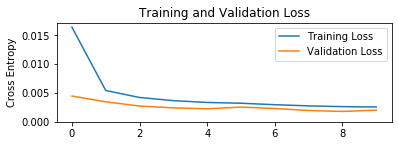

In [71]:
history=autoencoder_train


loss = history.history['loss']
val_loss = history.history['val_loss']


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [118]:
def fc(enco):
    flat = Flatten()(enco)
    den1 = Dense(128, activation='relu')(flat)
    den2 = Dense(64, activation='relu')(den1)
    den3= Dense(32, activation='relu')(den2)
    out = Dense(10, activation='softmax')(den3)
    return out

In [119]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [120]:
for l1,l2 in zip(full_model.layers[:12],autoencoder.layers[0:12]):
    l1.set_weights(l2.get_weights())

In [152]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_46 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_48 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
__________

In [121]:
autoencoder.get_weights()[0][1]

array([[[ 0.06832872,  0.05181962,  0.06401999, -0.11327738,
         -0.02439711,  0.18742841,  0.09656172,  0.01402676,
          0.10759597,  0.18262197, -0.09552689, -0.01538459,
          0.12628382, -0.04275186,  0.03472672, -0.03160597]],

       [[ 0.1146256 ,  0.12574972, -0.09352443,  0.05233024,
         -0.06431762,  0.02055052,  0.05384559, -0.05548501,
          0.19840375,  0.29032114,  0.11018151,  0.25713637,
          0.15966707, -0.09608641, -0.217792  , -0.10161638]],

       [[-0.08590484,  0.14841624, -0.13993509,  0.01749783,
         -0.07135317,  0.04837856,  0.05370022, -0.09128187,
          0.08479621,  0.17283484,  0.23627096,  0.16517745,
          0.03844638,  0.10796002, -0.06021195, -0.01563022]]],
      dtype=float32)

In [122]:
full_model.get_weights()[0][1]

array([[[ 0.06832872,  0.05181962,  0.06401999, -0.11327738,
         -0.02439711,  0.18742841,  0.09656172,  0.01402676,
          0.10759597,  0.18262197, -0.09552689, -0.01538459,
          0.12628382, -0.04275186,  0.03472672, -0.03160597]],

       [[ 0.1146256 ,  0.12574972, -0.09352443,  0.05233024,
         -0.06431762,  0.02055052,  0.05384559, -0.05548501,
          0.19840375,  0.29032114,  0.11018151,  0.25713637,
          0.15966707, -0.09608641, -0.217792  , -0.10161638]],

       [[-0.08590484,  0.14841624, -0.13993509,  0.01749783,
         -0.07135317,  0.04837856,  0.05370022, -0.09128187,
          0.08479621,  0.17283484,  0.23627096,  0.16517745,
          0.03844638,  0.10796002, -0.06021195, -0.01563022]]],
      dtype=float32)

In [123]:
for layer in full_model.layers[0:12]:
    layer.trainable = False

In [126]:
full_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(0.01),metrics=['accuracy'])

In [127]:
classify_train = full_model.fit(X_train, y_train, batch_size=100,epochs=10,verbose=1,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2176 - acc: 0.9434 - val_loss: 0.1472 - val_acc: 0.9604
Epoch 2/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1315 - acc: 0.9646 - val_loss: 0.1373 - val_acc: 0.9645
Epoch 3/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1292 - acc: 0.9679 - val_loss: 0.1266 - val_acc: 0.9698
Epoch 4/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1139 - acc: 0.9719 - val_loss: 0.1148 - val_acc: 0.9758
Epoch 5/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1109 - acc: 0.9753 - val_loss: 0.1459 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1051 - acc: 0.9757 - val_loss: 0.1088 - val_acc: 0.9770
Epoch 7/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0914 - acc: 0.9784 - val_loss: 0.1539 - val_acc

In [144]:
in_imgs = mnist.test.images[:10]
noise_factor=0.25
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

predicted_classes = full_model.predict(noisy_imgs.reshape((10, 28, 28, 1)))

In [145]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

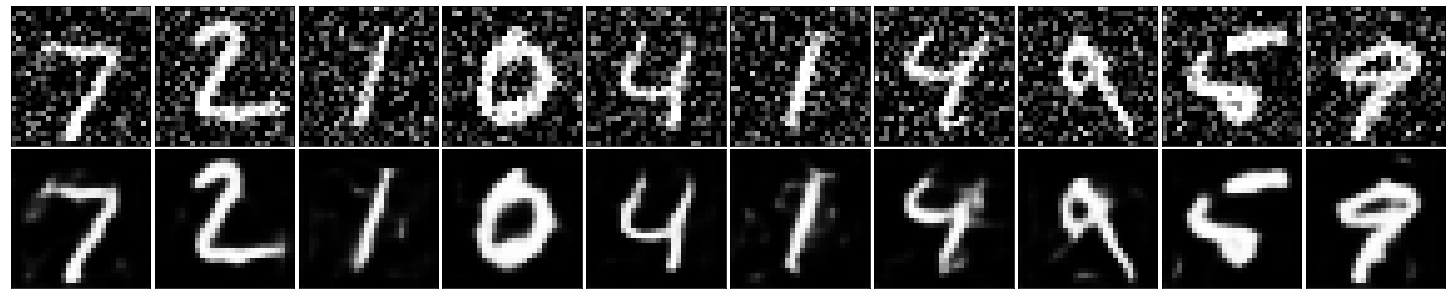

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noise_factor=0.25
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = autoencoder.predict(noisy_imgs.reshape((10, 28, 28, 1)))

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [151]:
predicted_classes 

array([7, 2, 1, 0, 4, 1, 0, 0, 8, 9], dtype=int64)

In [153]:
from keras.models import load_model

autoencoder.save('autoencoder.h5')
full_model.save('full_model.h5')